In [1]:
# visual
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# 在不同变换程度下对方向取均值
def get_visual_average(path_dataset,model,trans_type,direction=None,level=None):
    list_rep_var={}
    list_num_var={}
    list_num_repeat_var={}
    x=['05','10','15','20','25','30','35','40','45']
    # data_count=0
    pic_count=0 #统计有多少张图片
    for filename in os.listdir(path_dataset):   #每一张图片
        temp = path_dataset+filename+'/'
        # print(temp)
        list_rep={}
        list_num={}
        list_num_repeat={}
        pic_count = pic_count+1
        data_count=0
        for typee in os.listdir(temp):          #每一个变换
            # print(typee)
            attribute_list = typee.split('_')
            if(attribute_list[0] != trans_type):
                continue
            if(direction!=None and attribute_list[1] != direction):
                continue
            # if(attribute_list[2] != level):
            #     continue
            # print(typee)
            level_temp = attribute_list[2]
            data_count = data_count+1

            dir_temp = temp+typee+'/'
            # print(dir_temp)
            # 读取每一个模型的结果
            for modell in model:                #每一个模型的结果
                # print(modell)
                output_dir = dir_temp+modell+'_result/'
                rep = output_dir+'rep.txt'
                kp_num = output_dir+'kp_num.txt'
                # kp_repeat_num = output_dir+'kp_repeat_num.txt'
                # kp_repeat_num = output_dir+'kp_num.txt'
                rep = np.loadtxt(rep,dtype=np.float32, delimiter=' ')
                num = np.loadtxt(kp_num,dtype=np.float32, delimiter=' ')
                # num_repeat = np.loadtxt(kp_repeat_num,dtype=np.float32, delimiter=' ')

                # 重复率
                if modell not in list_rep:
                    list_rep[modell]={}
                if level_temp not in list_rep[modell]:
                    list_rep[modell][level_temp]=rep.item()
                else:
                    list_rep[modell][level_temp] = list_rep[modell][level_temp]+rep.item()
                # list_rep[modell].append(rep.item())
                # 特征点数量
                if modell not in list_num:
                    list_num[modell]={}
                if level_temp not in list_num[modell]:
                    list_num[modell][level_temp]=num.item()
                else:
                    list_num[modell][level_temp]=list_num[modell][level_temp]+num.item()
                # list_num[modell].append(num.item())
                # 特征点数量（公共区域
                # if modell not in list_num_repeat:
                #     list_num_repeat[modell]={}
                # if level_temp not in list_num_repeat[modell]:
                #     list_num_repeat[modell][level_temp]=num_repeat.item()
                # else:
                #     list_num_repeat[modell][level_temp]=list_num_repeat[modell][level_temp]+num_repeat.item()
                # list_num[modell].append(num.item())


        #计算不同图像间的方差
        for modell  in model:
            if modell not in list_rep_var:
                list_rep_var[modell] = {}
            if modell not in list_num_var:
                list_num_var[modell] = {}
            if modell not in list_num_repeat_var:
                list_num_repeat_var[modell] = {}
            for levell in list_rep[modell]:
                if levell not in list_rep_var[modell]:
                    list_rep_var[modell][levell] = []
                list_rep_var[modell][levell].append(list_rep[modell][levell]/(data_count/9))
                if levell not in list_num_var[modell]:
                    list_num_var[modell][levell] = []
                list_num_var[modell][levell].append(list_num[modell][levell]/(data_count/9))
                # if levell not in list_num_repeat_var[modell]:
                #     list_num_repeat_var[modell][levell] = []
                # list_num_repeat_var[modell][levell].append(list_num_repeat[modell][levell]/(data_count/9))
        
    # 刚才得到了在方向上的sum，现在要求average
    list_rep_average = {}
    list_num_average = {}
    # list_num_repeat_average = {}

    for modell in model:
        list_rep_average[modell]=[]
        list_num_average[modell]=[]
        # list_num_repeat_average[modell]=[]
        for levell in list_rep[modell]:
            list_rep_average[modell].append(np.std(list_rep_var[modell][levell]))
        for levell in list_num[modell]:
            list_num_average[modell].append(np.std(list_num_var[modell][levell]))
        # for levell in list_num_repeat[modell]:
            # list_num_repeat_average[modell].append(np.std(list_num_repeat_var[modell][levell]))
    print(list_rep_average)
    print(list_num_average)
    # print(list_num_repeat_average)

    

    
    # 绘制曲线
    # 创建一个图像
    plt.figure(figsize=(10,4),dpi=300)


    #重复率
    plt.subplot(1,2,1)
    if 'orb' in model:
        plt.plot(x, list_rep_average['orb'], marker='o', linestyle='-', color='blue', label='ORB')
    if 'sift' in model:
        plt.plot(x, list_rep_average['sift'], marker='s', linestyle='-', color='yellow', label='SIFT')
    if 'superpoint' in model:
        plt.plot(x, list_rep_average['superpoint'], marker='*', linestyle='-', color='green', label='SuperPoint')
    if 'rekd' in model:
        plt.plot(x, list_rep_average['rekd'], marker='^', linestyle='-', color='red', label='REKD')
    if 'keynet' in model:
        plt.plot(x, list_rep_average['keynet'], marker='+', linestyle='-', color='pink', label='Key.Net')
    # plt.title('R')
    plt.xlabel('θ')
    plt.ylabel('The Variance of R_avg')
    # 设置y轴的最小值和最大值
    # plt.ylim(0, 100)
    plt.legend()
    



    #特征点数量
    plt.subplot(1,2,2)
    if 'orb' in model:
        plt.plot(x, list_num_average['orb'], marker='o', linestyle='-', color='blue', label='ORB')
    if 'sift' in model:
        plt.plot(x, list_num_average['sift'], marker='s', linestyle='-', color='yellow', label='SIFT')
    if 'superpoint' in model:
        plt.plot(x, list_num_average['superpoint'], marker='*', linestyle='-', color='green', label='SuperPoint')
    if 'rekd' in model:
        plt.plot(x, list_num_average['rekd'], marker='^', linestyle='-', color='red', label='REKD')
    if 'keynet' in model:
        plt.plot(x, list_num_average['keynet'], marker='+', linestyle='-', color='pink', label='Key.Net')
    # plt.plot(x, list_num_average['disk'], marker='v', linestyle='-', color='black', label='disk')
    # 设置图像标题和轴标签
    # plt.title('num')
    plt.xlabel('θ')
    plt.ylabel('The Variance of Keypoint Num')
    # 添加图例
    plt.legend()



    # # 特征点数量（公共区域）
    # plt.subplot(1,2,2)
    # if 'orb' in model:
    #     plt.plot(x, list_num_repeat_average['orb'], marker='o', linestyle='-', color='blue', label='orb')
    # if 'sift' in model:
    #     plt.plot(x, list_num_repeat_average['sift'], marker='s', linestyle='-', color='yellow', label='sift')
    # if 'super_point' in model:
    #     plt.plot(x, list_num_repeat_average['super_point'], marker='*', linestyle='-', color='green', label='super_point')
    # if 'okd' in model:
    #     plt.plot(x, list_num_repeat_average['okd'], marker='^', linestyle='-', color='red', label='okd')
    # if 'keynet' in model:
    #     plt.plot(x, list_num_repeat_average['keynet'], marker='+', linestyle='-', color='pink', label='keynet')
    # # plt.plot(x, list_num_average['disk'], marker='v', linestyle='-', color='black', label='disk')
    # # 设置图像标题和轴标签
    # plt.title('num')
    # plt.xlabel('level')
    # plt.ylabel('count')
    # # 添加图例
    # plt.legend()



    # 显示图像
    plt.show()
    # break
    return list_rep_average

In [3]:
path_dataset = 'dataset_res/'
model = ['orb','sift','superpoint','rekd','keynet']
# model = ['orb','sift']

# 横坐标为变化程度，对所有图片所有方向取均值

{'orb': [3.821786623702572, 4.276781107545532, 5.005992832247499, 5.691918212976269, 6.328161165741811, 6.710117459078054, 7.357634844689043, 7.9229957483179705, 8.627790065062921], 'sift': [3.5930386984066236, 3.8052856611906867, 3.978547013727734, 4.114073151596345, 4.333335958076226, 4.448194538198346, 4.640468682538321, 4.829517989187135, 4.934521970796085], 'superpoint': [3.8609541526974036, 4.172184799365185, 4.284006100344405, 4.5616154637590505, 4.746424457077628, 4.97143155768556, 5.177587514594911, 5.42004414579405, 5.571540780678857], 'rekd': [0.8863871083948198, 1.082767933762631, 1.278757894446435, 1.4776792235890865, 1.6954378065175038, 1.9067143750524034, 2.19570978241589, 2.5190258908973875, 2.905880702747349], 'keynet': [7.638811937857004, 8.18455739657061, 8.852451766633962, 9.031758219095783, 9.760877311456008, 9.669390387407399, 9.125737156311079, 8.589313272328098, 9.19469992922633]}
{'orb': [20.575411780129095, 19.80158173132894, 19.251545636000245, 18.48266522100

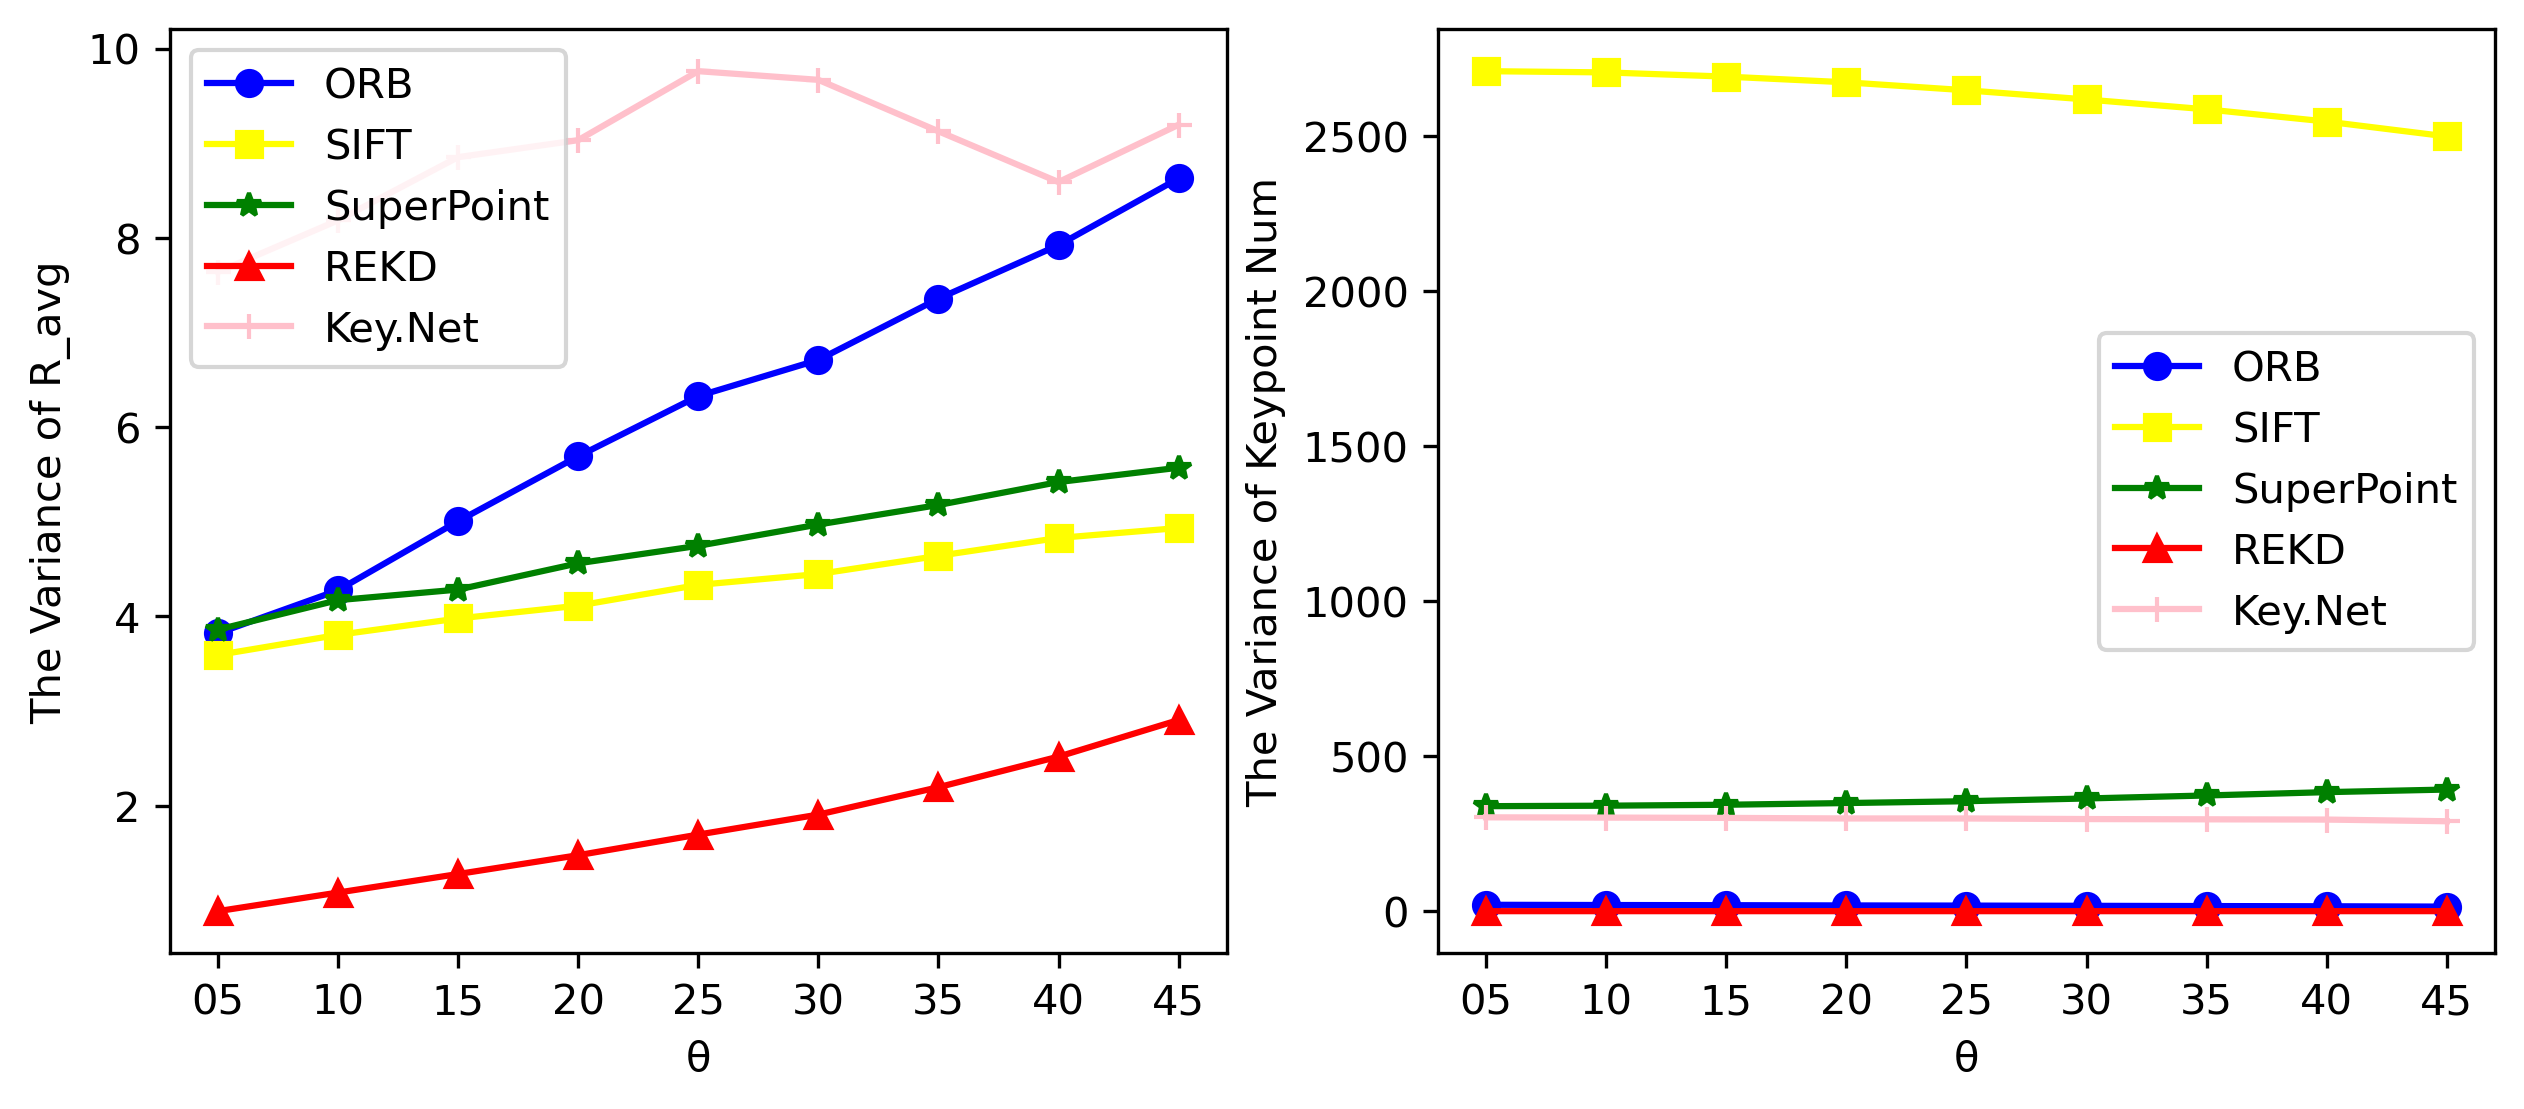

In [4]:
trans_type = 'perspective'
direction = None
level = None

list_rep_average = get_visual_average(path_dataset,model,trans_type,direction,level)